## Домашнее задание к лекции «Корреляция и корреляционный анализ»

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Задача 1.
Корреляция жесткости воды и годовой смертности в целом по стране

In [2]:
data = pd.read_csv('files/water.csv')

In [3]:
def print_statistics(df):
    # точечный график
    df.plot(kind='scatter', x='hardness', y='mortality')
    plt.title('Корреляция жесткости воды и годовой смертности на 100000 жителей')
    plt.show()
    
    # расчет коэффициентов корреляции
    print("Коэффициент корреляции Пирсона", 
          round(df[['hardness', 'mortality']].corr().loc['hardness', 'mortality'], 2))
    print("Коэффициент корреляции Спирмана", 
          round(df[['hardness', 'mortality']].corr(method='spearman').loc['hardness', 'mortality'], 2))

    # модель линейной регрессии
    X = df[['hardness']]
    Y = df['mortality']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=3)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    df['prediction'] = df.hardness.apply(lambda x: model.coef_[0] * x + model.intercept_)
    
    # коэффициент детерминации
    print("Коэффициент детерминации", round(model.score(x_test, y_test), 2))
    
    # анализ остатков
    df.plot(kind='scatter', x='hardness', y='mortality')
    plt.title('Анализ остатков')
    plt.plot(X, df['prediction'], c='red')
    for row_dict in df.to_dict(orient='records'):
        x1 = x2 = row_dict['hardness']
        y1 = row_dict['mortality']
        y2 = row_dict['prediction']
        plt.plot([x1, x2], [y1, y2], c='green', alpha=0.4)
    plt.show()

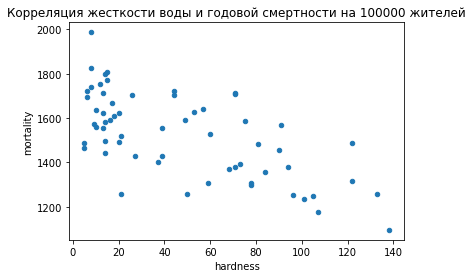

Коэффициент корреляции Пирсона -0.65
Коэффициент корреляции Спирмана -0.63
Коэффициент детерминации 0.55


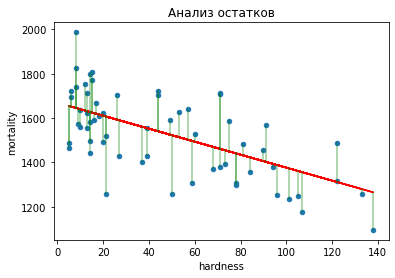

In [4]:
print_statistics(data)

### Задача 2.
Корреляция жесткости воды и годовой смертности в северных городах:

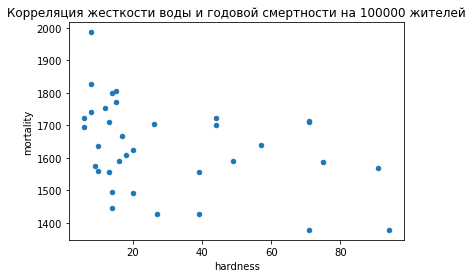

Коэффициент корреляции Пирсона -0.37
Коэффициент корреляции Спирмана -0.4
Коэффициент детерминации 0.11


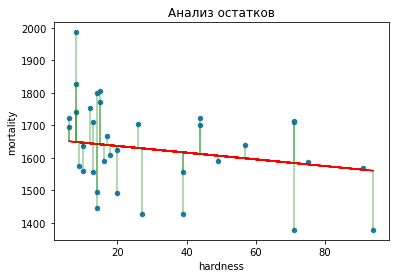

In [5]:
print_statistics(data[data.location == 'North'])

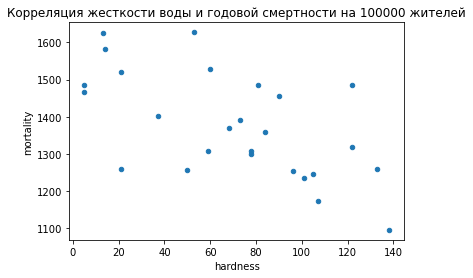

Коэффициент корреляции Пирсона -0.6
Коэффициент корреляции Спирмана -0.6
Коэффициент детерминации 0.39


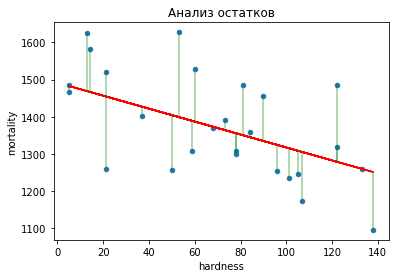

In [6]:
print_statistics(data[data.location == 'South'])

**Вывод:** для северных и южных городов по отдельности корреляция жесткости воды и годовой смертности  
значительно слабее чем в целом по стране. На севере, в частности, она практически отсутствует.

Дополнительное наблюдение: на севере вода мягче.